# Загрузка датасета и формулировка задачи

Датасет, над которым мы будем работать - [ссылка](https://docs.google.com/document/d/1hU42KOfxWDCsdzTRFGmxijyP_s8PMer9/edit?usp=sharing&ouid=104224382998920700370&rtpof=true&sd=true)

In [ ]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


Читаем csv файл, и проверяем получившийся датафрейм


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/PetProjects/Улучшение качества работы модели: подход feature engineering/dataset.csv")
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.433306,-4.106981,1.252722,4.842634,7.610817,1
1,-0.216705,3.832332,-10.054348,-1.106758,1.987823,0
2,8.574821,-2.495187,5.404009,-6.219058,6.954602,1
3,7.673529,-4.234502,8.135008,3.748393,3.457908,0
4,3.548824,-2.588106,-2.095070,7.993792,-3.523852,1


Задача: Изучить данные и построить Machine Learning модель для предсказания целевой переменной `target`

# Знакомство с данными. Разведочный анализ данных (EDA)

**Цели разведочного анализа данных:**

- Понимание структуры и характеристик набора данных

- Выявление аномалий и выбросов

- Идентификация связей и корреляций между переменными

- Подготовка данных для дальнейших этапов анализа


**Инструменты и методы EDA:**

1. Визуализация данных

Позволяет увидеть и понять паттерны, тренды и взаимосвязи в данных через графику и диаграммы.

2. Сводные статистики и меры центральной тенденции

Позволяют получить обобщенное представление о распределении данных и основных характеристиках. Это ключевые числовые метрики, которые помогают понять типичные и наиболее значимые значения в наборе данных (**mean, medianm mode**).

3. Корреляционный анализ

Помогает понять, какие переменные взаимосвязаны между собой и насколько сильна эта связь. Коэффициент корреляции измеряет степень линейной зависимости между двумя переменными

4. Преобразование данных (нормализация или стандартизация)

Проводится для того чтобы сделать данные более подходящими для анализа или моделирования. Это важный этап EDA, который помогает сгладить различия между переменными и создать более устойчивые и интерпретируемые данные.

5.  Анализ выбросов и аномалий

Выбросы и аномалии могут возникнуть из-за ошибок в данных, случайных событий или указывать на особенности исследуемого явления.

6. Обработка пропущенных значений

Пропущенные значения могут повлиять на анализ, поэтому важно обработать их



---



## Обработка пропущенных значений

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  3000 non-null   float64
 1   feature_2  3000 non-null   float64
 2   feature_3  3000 non-null   float64
 3   feature_4  3000 non-null   float64
 4   feature_5  3000 non-null   float64
 5   target     3000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 140.8 KB


Наш датасет состоит из 3000 строк, каждая из которых не является пустой. Это говорит о том что пропусков в данных взможно нет. Однако пропущенные значения могут присутствовать не явно, поэтому нужно исследовать данные дальше.

In [ ]:
# Еще один способ проверить пустые значения
df.isnull().sum()

feature_1    0
feature_2    0
feature_3    0
feature_4    0
feature_5    0
target       0
dtype: int64

In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000
mean,0.141861,0.042065,0.022336,0.023745,0.025611,0.60000
std,5.433073,5.389536,5.422549,5.340603,5.434483,0.48998
min,-12.936886,-12.810592,-13.454282,-13.194904,-13.433194,0.00000
25%,-4.095531,-4.044539,-4.101664,-4.076794,-3.951466,0.00000
50%,0.182078,0.082622,-0.024358,0.068921,0.032573,1.00000
75%,4.213366,4.009051,4.095432,4.136638,4.312101,1.00000
max,13.093660,13.866223,13.907629,13.360422,13.649220,1.00000


Видим что статистические метрики считаются на всех столбцах датасета, так же можно заметить что все `features` имеют похожую структуру (минимум, максимум и квантили  идентичны) - это говорит о том что пропущенных значений в датасете нет.

## Анализ распределения переменных и исследование корреляций между переменными

Изучим распределение числовых перменных и используем коэффициент корреляции, чтобы определить какие признаки имеют взаимосвязь.

Решить сразу 2 этих задачи мы можем, используя библиотеку для визуализации данных seaborn, а именно ее функцию `pairplot`.

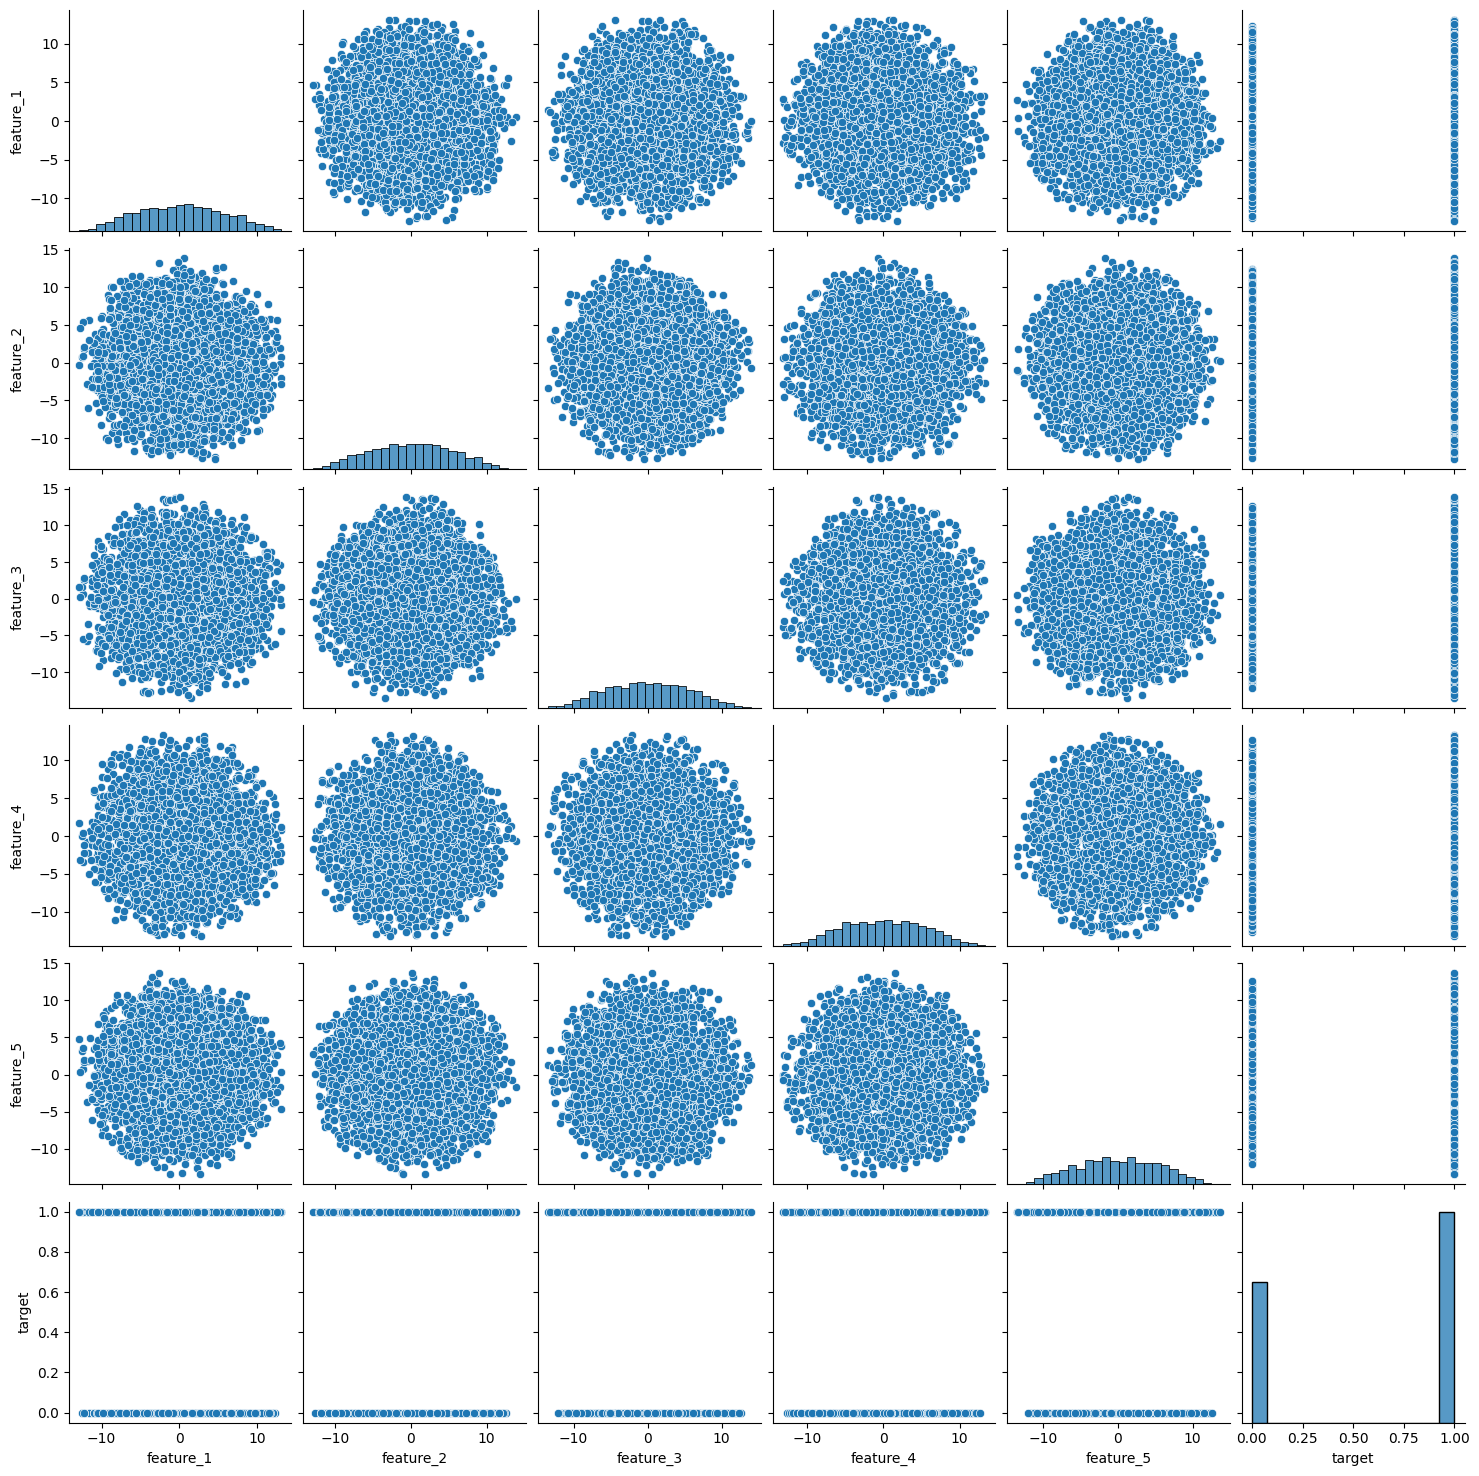

In [ ]:
import seaborn as sns

sns.pairplot(df)

В результате выполнения `pairplot` мы можем видеть сетку осей, в которой каждая перменная распределяется по осям X и Y.

Таким образом по главной диагонали сетки мы видим гистограммы каждой перемнной. Сразу стоит заметить что все гистограммы наших признаков `features` имеют одинаковое распределение, которое напоминает нормальное распределение, но "растянутое". Проверим насколько это текущие данные соответствуют нормальному распределению:

Строим QQ график, в котором красная прямая линия соответствует графику нормального распредлеения, а синия линия - соответствует распределению наших данных.
Если синяя линия будет идеально "наложена" на красную - это скажет о том что наши данные имеют нормальное распределение или что-то похожее на нормальное.

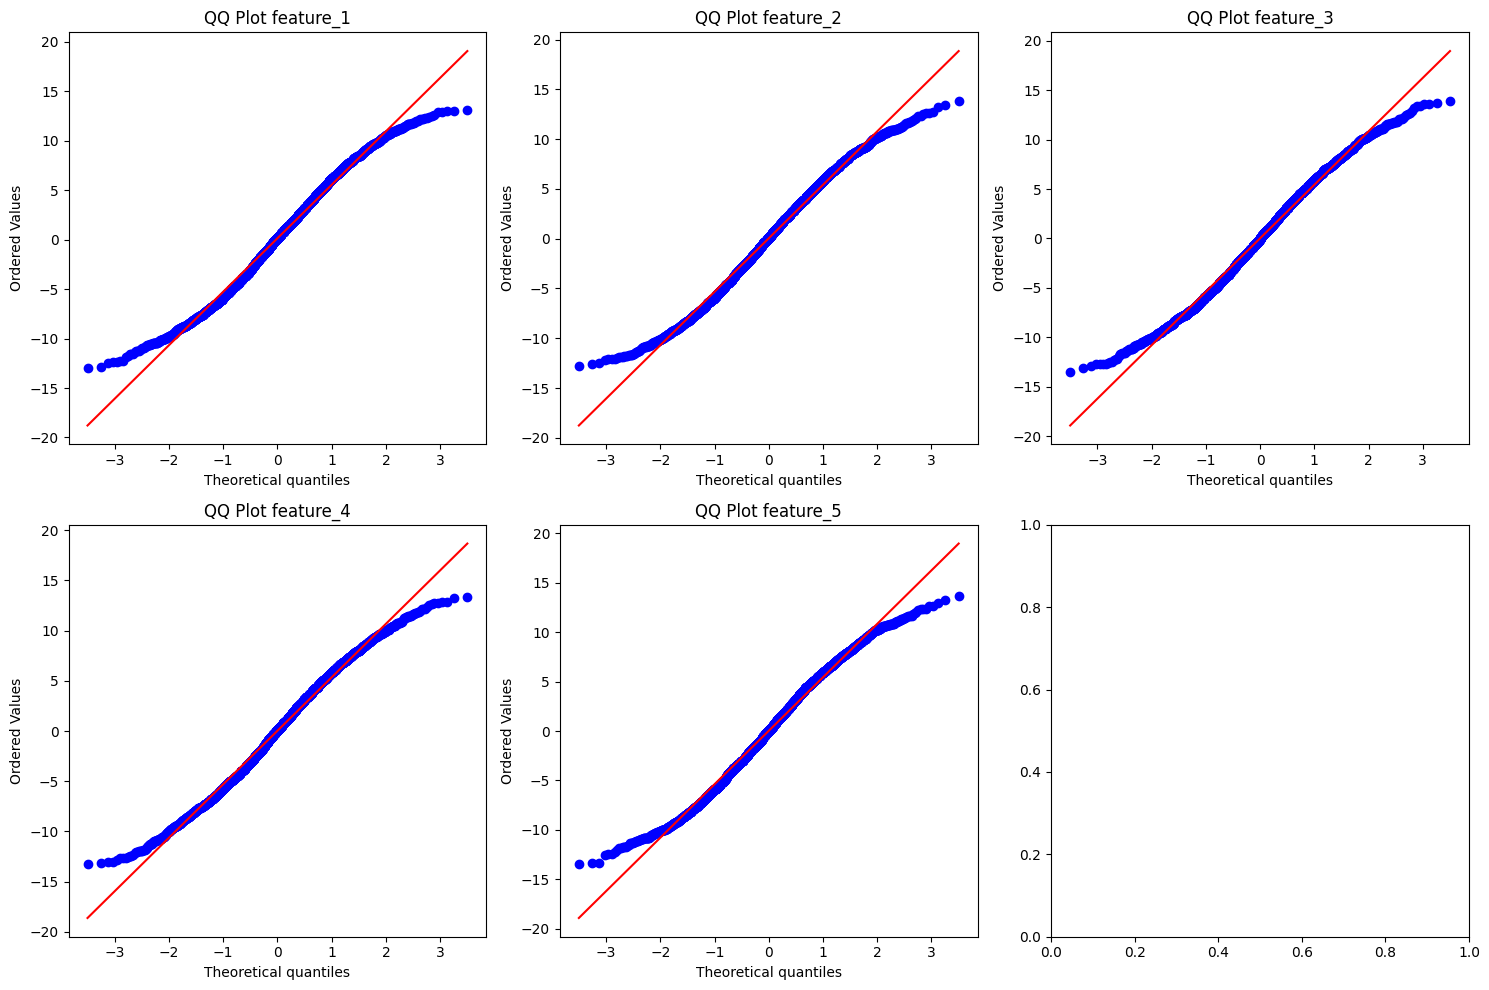

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
for i, column in enumerate(df.columns[:-1]):
  row = i // 3
  col = i % 3
  stats.probplot(df[column], dist="norm", plot=axes[row, col])
  axes[row, col].set_title(f'QQ Plot {column}')

plt.tight_layout()
plt.show()

Наши синие линии имеют хвосты слева и справа, на основе этого можно сделать вывод, что значения наших признаков не подчиняются нормальному закону распределения.

Для сравнения построим график QQ, данные которого бы почти идеально соответствовали нормальному распределению

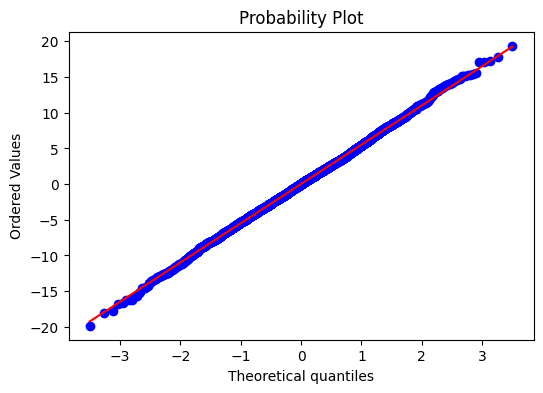

In [ ]:
import numpy as np

fig, axes = plt.subplots(figsize=(6, 4))
std_ = df.feature_1.std() # вычисляем отклонение
mean_ = df.feature_1.mean() #вычисляем среднее
gen_data = np.random.randn(3000)*std_ + mean_ # моделируем нормальное распределение
stats.probplot(gen_data, dist="norm", plot=axes)
plt.show()

Теперь рассмотрим 2 вопрос - корреляцию, на рисунке `pairplot` видно у всех наших признаков отсутствует явная корреляция между собой, это так же можно проверить если явно посчитать коэф-ты корреляции:

<Axes: >

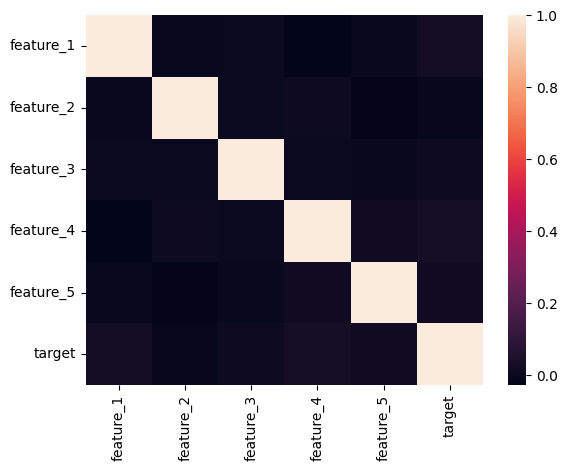

In [ ]:
# Посчитаем к-т корреляции по всему датасету df.corr() и построим тепловую карту.
sns.heatmap(df.corr())

Коэфициент корреляции между нашими признаками равен или практически равен 0, это значит что корреляции в данных нет. Это хорошо, так как  наличие признаков с высокой корреляционной связью могло бы ухудшить модель ML, которую мы будем создавать.

## Выявление выбросов и аномалий

Для выявления выбросов используем статистический метод - исследование квантилей.

Для этого нужно найти показатель IQR (межквартильный размах). Все данные нашего признака, которые будут превышать `1.5*IQR + 0.75` квантиль или которые будут меньше чем `0.25 - 1.5*IQR` будут считаться выбросами.

С выбросами можно бороться по-разному (например удалять или заменять), в нашем примере мы удалим выбросы, которые не проходят IQR проверку.

In [ ]:
for col in df.columns[:-1]:
  q_75 = df[col].quantile(0.75)
  q_25 = df[col].quantile(0.25)
  IQR = 1.5*(q_75 - q_25)
  low = q_25 - IQR
  high = q_75 + IQR

  df[col] = df[col][(df[col] >= low) & (df[col] <= high)]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  3000 non-null   float64
 1   feature_2  3000 non-null   float64
 2   feature_3  3000 non-null   float64
 3   feature_4  3000 non-null   float64
 4   feature_5  3000 non-null   float64
 5   target     3000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 140.8 KB


Видим что после такой манипуляции, количество данных не уменьшилось, а это значит что выбросов не было (как минимум по показетелю IQR).

Для поиска выбросов мы могли использовать так же и другие методы поиска (например Z-оценка (Z-score), Метод медианного абсолютного отклонения (MAD) или использовать машинное обучение), но уже сейчас по распределению и основным метрикам данных видно что выбросов нет, поэтому усложнять поиск мы не будем.

## Изучение категориальных переменных

Исследуем распределение и частоту нашей целевой переменной

In [ ]:
df.target.value_counts()

target
1    1800
0    1200
Name: count, dtype: int64

Text(0, 0.5, 'Частота')

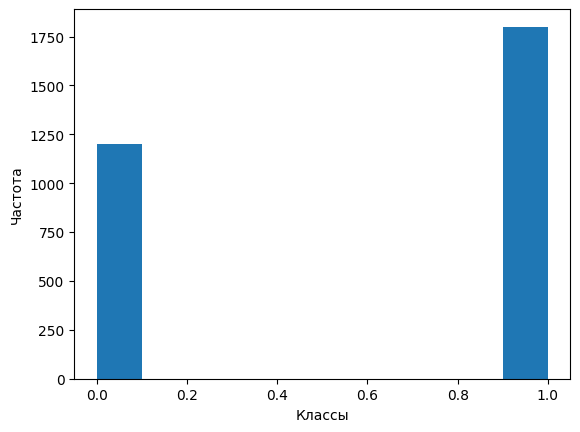

In [ ]:
plt.hist(df.target)
plt.xlabel('Классы')
plt.ylabel('Частота')

In [ ]:
class_1 = df[df.target==1].shape[0] / len(df)
class_0 = df[df.target==0].shape[0] / len(df)
print(f'Данные с меткой 1, занимают {class_1*100:.0f}% от всего датасета')
print(f'Данные с меткой 0, занимают {class_0*100:.0f}% от всего датасета')

Данные с меткой 1, занимают 60% от всего датасета
Данные с меткой 0, занимают 40% от всего датасета


In [ ]:
df[df.target==1].shape[0], df[df.target==0].shape[0]

(1800, 1200)

Видим что в нашей целевой переменной присутствует дисбаланс классов. В идеале чтобы количество классов было равное, это позволит моделям более качественно обучаться и избежать недообучения.

Мы можем решить эту проблему несколькими способами (например добавлением синтетических или дублированных данных или др. методами взаимодействия с данными, или можем предусмотреть факт дисбаланса в наших данных и выбрать ту модель, которая меньше всего подвержена эффекту дисбаланса.

Мы пойдем по 2 пути и выберем модель XGBoost, она представляет собой градиентный бустинг для построения ансамбля деревьев решений, такой подход минимизирует влияние классового дисбаланса.

## Стандартизация данных

Чтобы провести стандартизацию данных (z - преобразование) мы должны провести такую обработку перменных в результате которой среднее значение будет  = 0, а стандартное отклонение = 1

Сейчас данные показатели не такие как нам нужно

In [ ]:
df.feature_1.std(), df.feature_1.mean()

(5.433072864950876, 0.14186110018572634)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Применение стандартизации к данным
df.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.053652,-0.769962,0.226940,0.902462,1.395988,1
1,-0.066008,0.703381,-1.858603,-0.211716,0.361127,0
2,1.552412,-0.470852,0.992627,-1.169127,1.275217,1
3,1.386494,-0.793627,1.496349,0.697537,0.631683,0
4,0.627183,-0.488096,-0.390547,1.492598,-0.653246,1


In [ ]:
df.feature_1.std(), df.feature_1.mean()

(1.0001667083449108, 9.473903143468002e-18)

In [ ]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.00000
mean,2.368476e-18,-2.368476e-18,-2.368476e-18,1.657933e-17,-2.368476e-18,0.60000
std,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,1.000167e+00,0.48998
min,-2.407648e+00,-2.385140e+00,-2.485707e+00,-2.475535e+00,-2.476969e+00,0.00000
25%,-7.800555e-01,-7.583743e-01,-7.606547e-01,-7.679324e-01,-7.319445e-01,0.00000
50%,7.403496e-03,7.526313e-03,-8.612433e-03,8.460332e-03,1.281282e-03,1.00000
75%,7.495176e-01,7.361760e-01,7.512658e-01,7.702460e-01,7.888892e-01,1.00000
max,2.384278e+00,2.565427e+00,2.561085e+00,2.497639e+00,2.507300e+00,1.00000


Отлично, стандартизация выполнена, теперь среднее значение признаков в 0, а стандартное отклонение в 1

# Создание и обучение модели

Перед обучением модели нам необходимо поделить все данные на тренировочные, тестовые и валидационные. Сделаем это

In [ ]:
from sklearn.model_selection import train_test_split

x = df.iloc[:, :-1]
y = df.target

# 5% данных станут валидационными
x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                    train_size=0.95,
                                                    random_state=123)
# 20% оставшихся данных станут тестовыми
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,
                                                    train_size=0.8,
                                                    random_state=123)

print('тренировочные данные - ', x_train.shape, y_train.shape)
print('тестовые данные - ', x_test.shape, y_test.shape)
print('валидационные данные - ', x_val.shape, y_val.shape)

тренировочные данные -  (2280, 5) (2280,)
тестовые данные -  (570, 5) (570,)
валидационные данные -  (150, 5) (150,)


Мы приняли решение что моделью будет выступать XGBoost.

Для того чтобы найти идеальные параметры модели - воспользуемся методом рандомного поиска, RandomSearch

In [ ]:
!pip install xgboost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import xgboost as xgb

# Определение пространства параметров для случайного поиска
param_space = {
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 7, 9, 11, 13],
  'learning_rate': [0.01, 0.1, 0.3, 0.03],
  'subsample': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
  'gamma': [0, 1, 5, 7],
  'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
  'reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

# Создание объекта модели с учетом дисбаланса классов
model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum())

# Создание объекта случайного поиска
random_search = RandomizedSearchCV(model, param_distributions=param_space,
                                   n_iter=100, scoring='roc_auc',
                                   cv=15, verbose=2, random_state=123, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель, с лучшими параметрами
best_model = random_search.best_estimator_


roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
print("ROC AUC на тестовых данных:", roc_auc_test)

# Оценка качества модели на валидационных данных
roc_auc_val = roc_auc_score(y_val, best_model.predict_proba(x_val)[:, 1])
print("ROC AUC на валидационных данных:", roc_auc_val)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Лучшие параметры: {'subsample': 0.9, 'reg_lambda': 0.01, 'reg_alpha': 0.001, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.03, 'gamma': 0, 'colsample_bytree': 0.1}
ROC AUC на тестовых данных: 0.5026865671641791
ROC AUC на валидационных данных: 0.49103942652329746




---



Попробуем `RandomForestClassifier`

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Определение пространства параметров для случайного поиска
param_space = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Создание объекта модели
model = RandomForestClassifier()

# Создание объекта случайного поиска
random_search = RandomizedSearchCV(model, param_distributions=param_space,
                                   n_iter=100, scoring='roc_auc',
                                   cv=15, verbose=2, random_state=123, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель с лучшими параметрами
best_model = random_search.best_estimator_

# Оценка качества модели на тестовых данных
roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
print("ROC AUC на тестовых данных:", roc_auc_test)

# Оценка качества модели на валидационных данных
roc_auc_val = roc_auc_score(y_val, best_model.predict_proba(x_val)[:, 1])
print("ROC AUC на валидационных данных:", roc_auc_val)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 13, 'bootstrap': True}
ROC AUC на тестовых данных: 0.5271768815496983
ROC AUC на валидационных данных: 0.552725900773439


- LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Определение пространства параметров для случайного поиска
param_space = {
    'num_leaves': [20, 30, 40, 50],
    'max_depth': [3, 5, 7, 9, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1.0],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1.0],
    'min_child_samples': [20, 30, 40, 50]
}

# Создание объекта модели
model = lgb.LGBMClassifier()

# Создание объекта случайного поиска
random_search = RandomizedSearchCV(model, param_distributions=param_space,
                                   n_iter=100, scoring='roc_auc',
                                   cv=5, verbose=2, random_state=123, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель с лучшими параметрами
best_model = random_search.best_estimator_

# Оценка качества модели на тестовых данных
roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
print("ROC AUC на тестовых данных:", roc_auc_test)

# Оценка качества модели на валидационных данных
roc_auc_val = roc_auc_score(y_val, best_model.predict_proba(x_val)[:, 1])
print("ROC AUC на валидационных данных:", roc_auc_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 1372, number of negative: 908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2280, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601754 -> initscore=0.412780
[LightGBM] [Info] Start training from score 0.412780
Лучшие параметры: {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 30, 'min_child_samples': 50, 'max_depth': -1, 'learning_rate': 0.3, 'colsample_bytree': 0.8}
ROC AUC на тестовых данных: 0.5201016195617656
ROC AUC на валидационных данных: 0.4806640256555367


- logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Определение пространства параметров для случайного поиска
param_space = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 200, 300, 400, 500]
}

# Создание объекта модели с учетом дисбаланса классов
model = LogisticRegression()

# Создание объекта случайного поиска
random_search = RandomizedSearchCV(model, param_distributions=param_space,
                                   n_iter=100, scoring='roc_auc',
                                   cv=5, verbose=2, random_state=123, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель с лучшими параметрами
best_model = random_search.best_estimator_

# Оценка качества модели на тестовых данных
roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
print("ROC AUC на тестовых данных:", roc_auc_test)

# Оценка качества модели на валидационных данных
roc_auc_val = roc_auc_score(y_val, best_model.predict_proba(x_val)[:, 1])
print("ROC AUC на валидационных данных:", roc_auc_val)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'class_weight': None, 'C': 0.001}
ROC AUC на тестовых данных: 0.5
ROC AUC на валидационных данных: 0.5


- метод опорных вектором SVC

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Определение пространства параметров для случайного поиска
param_space = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'class_weight': ['balanced', None]
}

# Создание объекта модели с учетом дисбаланса классов
model = SVC()

# Создание объекта случайного поиска
random_search = RandomizedSearchCV(model, param_distributions=param_space,
                                   n_iter=100, scoring='roc_auc',
                                   cv=5, verbose=2, random_state=123, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель с лучшими параметрами
best_model = random_search.best_estimator_

# Оценка качества модели на тестовых данных
roc_auc_test = roc_auc_score(y_test, best_model.predict(x_test))
print("ROC AUC на тестовых данных:", roc_auc_test)

# Оценка качества модели на валидационных данных
roc_auc_val = roc_auc_score(y_val, best_model.predict(x_val))
print("ROC AUC на валидационных данных:", roc_auc_val)

Лучшие параметры: {'kernel': 'rbf', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 100}
ROC AUC на тестовых данных: 0.8204826929183867
ROC AUC на валидационных данных: 0.8602150537634409


# Вывод 1:

Модель опорных векторов SVC справилась с задачей лучше всех остальных и показала метрику ROC AUC 0.82 на тестовых и 0.86 на валидационных данных.

SVM стремится найти оптимальную гиперплоскость разделения между классами данных. В некоторых случаях SVM может лучше справляться с сложными нелинейными структурами данных, чем другие модели, такие как логистическая регрессия или деревья решений. Так же важно заметить что модель SVC устойчива к шумам и выбросам в данных особенно на небольшом обьеме данных, по сравнению с другими сложными моделями (даже несмотря на то что мы не обнаружили явных выбросов и шумов в наших данных).

Так же важной частью являются гиперпараметры, которые нашлись методом случайного поиска, а именно `kernel=rbf` - радиальное базисное функциональное ядро, оно позволяет модели создавать нелинейные разделяющие гиперплоскости, это может быть полезно для обобщения сложных структур данных.

`C` - регуляризация в SVM. Управляет уровнем штрафа за нарушение мягкой границы разделения между классами. Установка более высокого значения `C` позволяет модели создавать более сложные разделяющие гиперплоскости и может привести к лучшей адаптации к обучающим данным.





# Тесты моделей с измененными данными

Существует вероятность что сложные модели не смогли показать хорошую метрику ROC AUC из-за того что данные не подходили для этих моделей.

Попробуем усложнить наш датасет, добавив в него новые столбцы признаков.

- Добавление полинома

In [ ]:
for col in df.drop('target', axis=1):
  df[col+'pol2'] = df[col]**2
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target,feature_1pol2,feature_2pol2,feature_3pol2,feature_4pol2,feature_5pol2
0,0.053652,-0.769962,0.226940,0.902462,1.395988,1,0.002879,0.592841,0.051502,0.814438,1.948781
1,-0.066008,0.703381,-1.858603,-0.211716,0.361127,0,0.004357,0.494745,3.454404,0.044824,0.130413
2,1.552412,-0.470852,0.992627,-1.169127,1.275217,1,2.409982,0.221702,0.985309,1.366858,1.626179
3,1.386494,-0.793627,1.496349,0.697537,0.631683,0,1.922366,0.629844,2.239060,0.486558,0.399023
4,0.627183,-0.488096,-0.390547,1.492598,-0.653246,1,0.393359,0.238237,0.152527,2.227850,0.426730


- Добавление признаков взаимодействия

In [ ]:
for i, col in enumerate(df.iloc[:, :5].columns):
  if col == 'feature_5': break
  df[col+df.iloc[:, i+1].name] = df[col] + df.iloc[:, i+1]
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target,feature_1pol2,feature_2pol2,feature_3pol2,feature_4pol2,feature_5pol2,feature_1feature_2,feature_2feature_3,feature_3feature_4,feature_4feature_5
0,0.053652,-0.769962,0.226940,0.902462,1.395988,1,0.002879,0.592841,0.051502,0.814438,1.948781,-0.716310,-0.543022,1.129402,2.298450
1,-0.066008,0.703381,-1.858603,-0.211716,0.361127,0,0.004357,0.494745,3.454404,0.044824,0.130413,0.637373,-1.155221,-2.070319,0.149411
2,1.552412,-0.470852,0.992627,-1.169127,1.275217,1,2.409982,0.221702,0.985309,1.366858,1.626179,1.081559,0.521775,-0.176500,0.106090
3,1.386494,-0.793627,1.496349,0.697537,0.631683,0,1.922366,0.629844,2.239060,0.486558,0.399023,0.592867,0.702722,2.193886,1.329220
4,0.627183,-0.488096,-0.390547,1.492598,-0.653246,1,0.393359,0.238237,0.152527,2.227850,0.426730,0.139087,-0.878642,1.102052,0.839352


- добавление статистических признаков

In [ ]:
df['mean_'] = (df.feature_1+df.feature_2+df.feature_3+df.feature_4+df.feature_5)/5
df['std_'] = np.std([df.feature_1, df.feature_2, df.feature_3, df.feature_4, df.feature_5], axis=0)

df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target,feature_1pol2,feature_2pol2,feature_3pol2,feature_4pol2,feature_5pol2,feature_1feature_2,feature_2feature_3,feature_3feature_4,feature_4feature_5,mean_,std_
0,0.053652,-0.769962,0.226940,0.902462,1.395988,1,0.002879,0.592841,0.051502,0.814438,1.948781,-0.716310,-0.543022,1.129402,2.298450,0.361816,0.742413
1,-0.066008,0.703381,-1.858603,-0.211716,0.361127,0,0.004357,0.494745,3.454404,0.044824,0.130413,0.637373,-1.155221,-2.070319,0.149411,-0.214364,0.883061
2,1.552412,-0.470852,0.992627,-1.169127,1.275217,1,2.409982,0.221702,0.985309,1.366858,1.626179,1.081559,0.521775,-0.176500,0.106090,0.436055,1.063890
3,1.386494,-0.793627,1.496349,0.697537,0.631683,0,1.922366,0.629844,2.239060,0.486558,0.399023,0.592867,0.702722,2.193886,1.329220,0.683687,0.817277
4,0.627183,-0.488096,-0.390547,1.492598,-0.653246,1,0.393359,0.238237,0.152527,2.227850,0.426730,0.139087,-0.878642,1.102052,0.839352,0.117579,0.820924


Теперь проверим помогло ли это улучшить качество моделей, которые раньше справлялись плохо:

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('target', axis=1)
y = df.target

# 5% данных станут валидационными
x_train, x_val, y_train, y_val = train_test_split(x, y,
                                                    train_size=0.95,
                                                    random_state=123)
# 20% оставшихся данных станут тестовыми
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train,
                                                    train_size=0.8,
                                                    random_state=123)

print('тренировочные данные - ', x_train.shape, y_train.shape)
print('тестовые данные - ', x_test.shape, y_test.shape)
print('валидационные данные - ', x_val.shape, y_val.shape)

тренировочные данные -  (2280, 16) (2280,)
тестовые данные -  (570, 16) (570,)
валидационные данные -  (150, 16) (150,)


Начнем с модели XGBoost

Прошлые ее результаты:

ROC AUC на тестовых данных: 0.5026865671641791


ROC AUC на валидационных данных: 0.49103942652329746

In [ ]:
# Определение пространства параметров для случайного поиска
param_space = {
  'n_estimators': [100, 200, 300],
  'max_depth': [3, 5, 7, 9, 11, 13],
  'learning_rate': [0.01, 0.1, 0.3, 0.03],
  'subsample': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
  'gamma': [0, 1, 5, 7],
  'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
  'reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

# Создание объекта модели с учетом дисбаланса классов
model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) - y_train.sum()) / y_train.sum())

# Создание объекта случайного поиска
random_search = RandomizedSearchCV(model, param_distributions=param_space,
                                   n_iter=100, scoring='roc_auc',
                                   cv=5, verbose=2, random_state=123, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель, с лучшими параметрами
best_model = random_search.best_estimator_


roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
print("ROC AUC на тестовых данных:", roc_auc_test)

# Оценка качества модели на валидационных данных
roc_auc_val = roc_auc_score(y_val, best_model.predict_proba(x_val)[:, 1])
print("ROC AUC на валидационных данных:", roc_auc_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 13, 'learning_rate': 0.03, 'gamma': 1, 'colsample_bytree': 0.8}
ROC AUC на тестовых данных: 0.9873737694506193
ROC AUC на валидационных данных: 0.9869835880022637


модель XGBoost улучшила свои показатели и достигла метрики roc auc  почти равной 0.99 что очень близко к максимуму.

Такого результата получилось добиться усложнением взаимосвязей в наших данных и теперь модель XGBoost получает как данные как раз той сложности, с которой она справляется, модель находит те взаимосвязи в данных, которых раньше она увидеть не могла.

Иногда такое случается так же не только из-за хорошо подобранной модели и признаков, но из-за переобучения, проверим могут ли новые признаки переобучить модель:

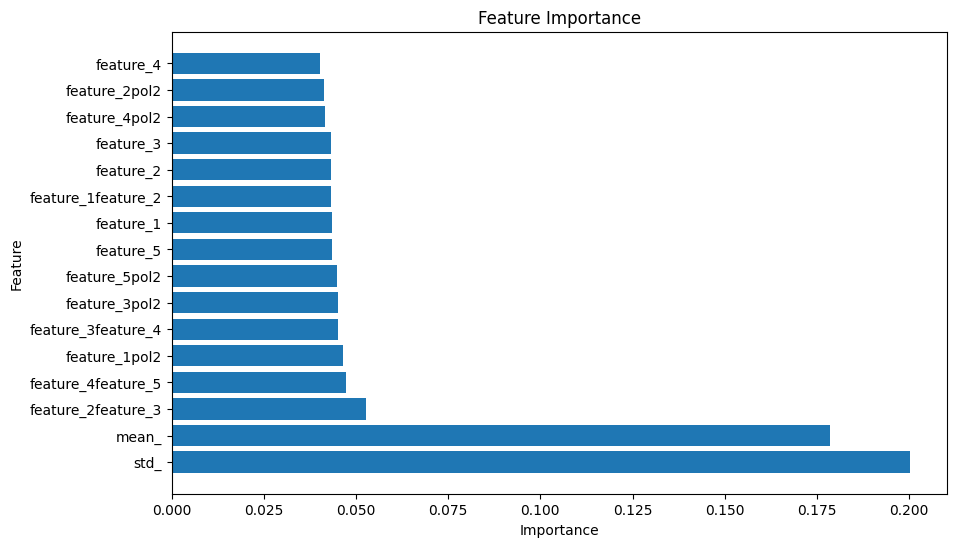

In [ ]:
# Посмотрим какие признаки дали самый большой прирост в том как стала предсказывать модель
importance = random_search.best_estimator_.feature_importances_

# Создание DataFrame с признаками и их важностью
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importance})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

Видим что 2 новых статистических признака дают самый большой прирост в качестве 20 и 18% соответственно. Однако остальные признаки тоже влияют на предсказание (примерно по 5% каждый).

Если признаки с высоким приростом качества коррелируют между собой или с другими признаками в наборе данных, это может привести к увеличению их важности. В этом случае для нас может быть смысл провести дополнительный анализ корреляции между признаками, чтобы убедиться, что они действительно информативны и не дублируют друг друга.

<Axes: >

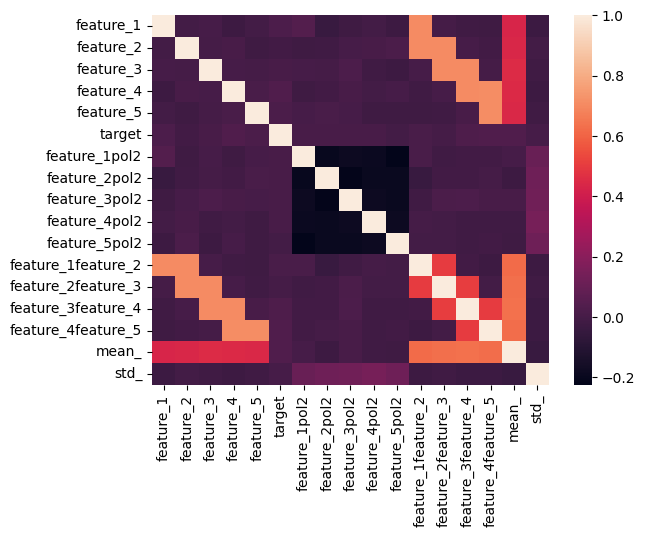

In [ ]:
sns.heatmap(df.corr())

корреляции между новыми статистическими признаками нет, значит все в порядке, они не дублируют друг друга.

- LGB

Прошлый результат:

ROC AUC на тестовых данных: 0.5201016195617656

ROC AUC на валидационных данных: 0.4806640256555367

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Определение пространства параметров для случайного поиска
param_space = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9, 11, 13],
    'learning_rate': [0.01, 0.1, 0.3, 0.03],
    'subsample': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.8, 0.9],
    'gamma': [0, 1, 5, 7],
    'reg_alpha': [0, 0.001, 0.01, 0.1, 1],
    'reg_lambda': [0, 0.001, 0.01, 0.1, 1]
}

# Создание объекта модели
model = lgb.LGBMClassifier()

# Создание объекта случайного поиска
random_search = RandomizedSearchCV(model, param_distributions=param_space,
                                   n_iter=100, scoring='roc_auc',
                                   cv=5, verbose=0, random_state=123, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(x_train[['std_', 'mean_']], y_train)
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель с лучшими параметрами
best_model = lgb.LGBMClassifier(**best_params)

# Обучение модели
best_model.fit(x_train, y_train)

# Оценка качества модели на тестовых данных
roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
print("ROC AUC на тестовых данных:", roc_auc_test)

# Оценка качества модели на валидационных данных
roc_auc_val = roc_auc_score(y_val, best_model.predict_proba(x_val)[:, 1])
print("ROC AUC на валидационных данных:", roc_auc_val)


[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1372, number of negative: 908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4080
[LightGBM] [Info] Number of data points in the train set: 2280, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601754 -> initscore=0.412780
[LightGBM] [Info] Start training from score 0.412780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

Модель LGB тоже отлично справилась на новых данных, даже несмотря на то что она использует алгоритмы гистограммного бустинга, который строит гистограммы для признаков, в отличии от XGBoost, которая строит решающие деревья. LGB все равно поняла закономерности в данных и смогла показать высокую метрику ROC AUC

П.С. на варнинги можно не обращать внимание

Проверим важность фич и для LGB

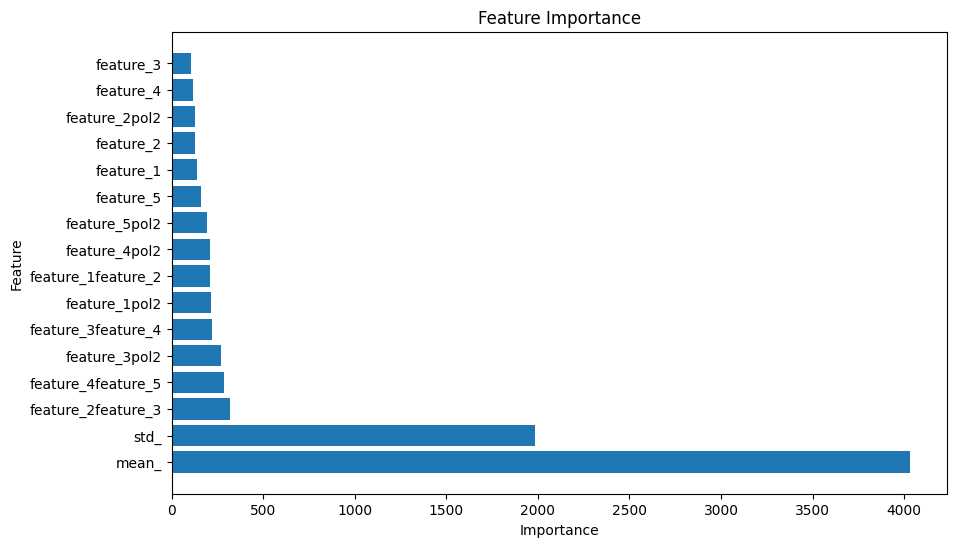

In [ ]:
# Посмотрим какие признаки дали самый большой прирост в том как стала предсказывать модель
importance = best_model.feature_importances_

# Создание DataFrame с признаками и их важностью
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': importance})

# Сортировка признаков по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

можно заметить что LGB дает более высокую важность для 2 новых статистических признаках и может быть этой модели хватило бы только их 2 чтобы предсказывать целевое значение с высокой точностью.

Проверим эту гипотезу, оставим только `std_ и mean_` и обучим модель заново

In [ ]:
random_search.fit(x_train[['std_', 'mean_']], y_train)
best_params = random_search.best_params_
best_model = lgb.LGBMClassifier(**best_params)
best_model.fit(x_train[['std_', 'mean_']], y_train)

roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test[['std_', 'mean_']])[:, 1])
print("ROC AUC на тестовых данных:", roc_auc_test)

roc_auc_val = roc_auc_score(y_val, best_model.predict_proba(x_val[['std_', 'mean_']])[:, 1])
print("ROC AUC на валидационных данных:", roc_auc_val)

[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1372, number of negative: 908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 2280, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.601754 -> initscore=0.412780
[LightGBM] [Info] Start training from score 0.412780
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

Видим что оставив только 2 статистических параметра точность предсказаний модели не стала хуже, а даже подросла почти од 100%

- Logistic Regression

Прошлый результат:

ROC AUC на тестовых данных: 0.5

ROC AUC на валидационных данных: 0.5

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Определение пространства параметров для случайного поиска
param_space = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None],
    'max_iter': [100, 200, 300, 400, 500]
}

# Создание объекта модели с учетом дисбаланса классов
model = LogisticRegression()

# Создание объекта случайного поиска
random_search = RandomizedSearchCV(model, param_distributions=param_space,
                                   n_iter=100, scoring='roc_auc',
                                   cv=5, verbose=2, random_state=123, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель с лучшими параметрами
best_model = random_search.best_estimator_

# Оценка качества модели на тестовых данных
roc_auc_test = roc_auc_score(y_test, best_model.predict_proba(x_test)[:, 1])
print("ROC AUC на тестовых данных:", roc_auc_test)

# Оценка качества модели на валидационных данных
roc_auc_val = roc_auc_score(y_val, best_model.predict_proba(x_val)[:, 1])
print("ROC AUC на валидационных данных:", roc_auc_val)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'solver': 'liblinear', 'penalty': 'l1', 'max_iter': 100, 'class_weight': None, 'C': 0.001}
ROC AUC на тестовых данных: 0.5
ROC AUC на валидационных данных: 0.5


Результат logistic regression не улучшился, это не удивительно, так как мы добавили новые признаки - тем самым усложнив наши данные, а для нахождения сложных зависимостей нужна сложная модель, в то время как logistic regression является самое простое "наивной" моделью, которая не может обнаружить сложные закономерности в данных.

- SVC

Прошлый результат:

ROC AUC на тестовых данных: 0.8204826929183867

ROC AUC на валидационных данных: 0.8602150537634409

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score

# Определение пространства параметров для случайного поиска
param_space = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['auto'],
    'class_weight': ['balanced']
}

# Создание объекта модели с учетом дисбаланса классов
model = SVC()

# Создание объекта случайного поиска
random_search = RandomizedSearchCV(model, param_distributions=param_space,
                                   n_iter=100, scoring='roc_auc',
                                   cv=5, verbose=2, random_state=123, n_jobs=-1)

# Поиск лучших параметров
random_search.fit(x_train, y_train)
best_params = random_search.best_params_
print("Лучшие параметры:", best_params)

# Создаем модель с лучшими параметрами
best_model = random_search.best_estimator_

# Оценка качества модели на тестовых данных
roc_auc_test = roc_auc_score(y_test, best_model.predict(x_test))
print("ROC AUC на тестовых данных:", roc_auc_test)

# Оценка качества модели на валидационных данных
roc_auc_val = roc_auc_score(y_val, best_model.predict(x_val))
print("ROC AUC на валидационных данных:", roc_auc_val)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 12 is smaller than n_iter=100. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры: {'kernel': 'poly', 'gamma': 'auto', 'class_weight': 'balanced', 'C': 100}
ROC AUC на тестовых данных: 0.824738012067323
ROC AUC на валидационных данных: 0.8602150537634409


Качество модели SVC осталось без изменений

# Вывод 2:

После добавления новых признаков, созданных разными способами (от полиномиальных до статических), мы получили более сложные взаимосвязи между данными, поэтому такие же сложные модели XGBoost и LightBoost смогли показать высокую метрику ROC AUC почти равную 1, что является максимумом.

Причем важно заметить что вся сложность заключалась в том чтобы найти ту комбинацию новых параметров, которая бы правильно обобщала исходные данные.